<a href="https://colab.research.google.com/github/rohan53532211/Handwritten-Digit-Classifier/blob/main/Handwritten_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import logging

# Setup
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

# ---- Softmax Test ----
def my_softmax(z):
    g = np.exp(z)
    a = g / np.sum(g)
    return a

z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# ---- Load and preprocess training data ----
train_path = '/content/train.csv'
train_df = pd.read_csv(train_path)
y = train_df.iloc[:, 0].values                    # labels
X = train_df.drop(train_df.columns[0], axis=1).values  # pixel values (784 columns)

# ---- Load and preprocess test data ----
test_path = '/content/test.csv'
X_test = pd.read_csv(test_path).values  # 784 columns, no label
print(f"Train shape before impute: {X.shape}")
print(f"Test shape before impute: {X_test.shape}")
# ---- Impute and Normalize ----
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)

X = X / 255.0
X_test = X_test / 255.0
      # transform test

m, n = X.shape
print(f"The shape of X is: {X.shape}")
print(f"The shape of y is: {y.shape}")


my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
Train shape before impute: (42000, 784)
Test shape before impute: (28000, 784)
The shape of X is: (42000, 784)
The shape of y is: (42000,)


In [2]:
print(m,n)

42000 784


In [3]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (42000, 784)
The shape of y is: (42000,)


In [5]:

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(784,)),
        Dense(25,activation='relu',name='V'),
        Dense(15,activation='relu',name='I'),
        Dense(10,activation='linear',name='S'),



        ### END CODE HERE ###
    ], name = "my_model"
)

In [6]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ V (Dense)                       │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ I (Dense)                       │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S (Dense)                       │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
[layer1, layer2, layer3] = model.layers

In [8]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=50
)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.8172
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2285
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1827
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1543
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1358
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1216
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1103
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1014
Epoch 9/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0938
Epoch 10/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0872
Epoch 11/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0818
Epoch 12/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0764
Epoch 13/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0713
Epoch 14/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0666
Epoch 15/50
1313/1313 ━━━━━━━

In [10]:
def display_digit(pixel_array):
    # Reshape the 1D array (784,) into a 2D array (28, 28)
    image = np.reshape(pixel_array, (28, 28))

    # Display the image
    plt.figure(figsize=(3, 3))  # Adjust the figure size as needed
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

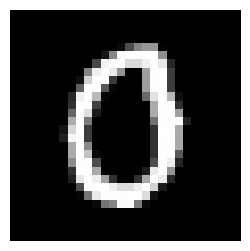

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
 predicting a Two: 
[[ 32.25 -67.55 -17.99 -35.91 -21.02 -18.67  -5.53   3.97  -5.82   2.82]]
 Largest Prediction index: 0


In [11]:
image_of_two = X_test[100]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [12]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.00e+00 0.00e+00 1.52e-22 2.49e-30 7.32e-24 7.63e-23 3.88e-17 5.23e-13
  2.92e-17 1.65e-13]]
Total of predictions: 1.000


In [13]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 0
